

# 🚀 HierarchiClustering: Application to Fashion MNIST

# 🚀 Djaber Achref 
In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
import kagglehub


c:\Users\Djaber\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

# Load the dataset      

df = pd.read_csv(path+'/fashion-mnist_train.csv')

X = df.drop('label', axis=1)

y = df['label']

Path to dataset files: C:\Users\Djaber\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


## A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


The number of images = 60000
The number of classes = 10


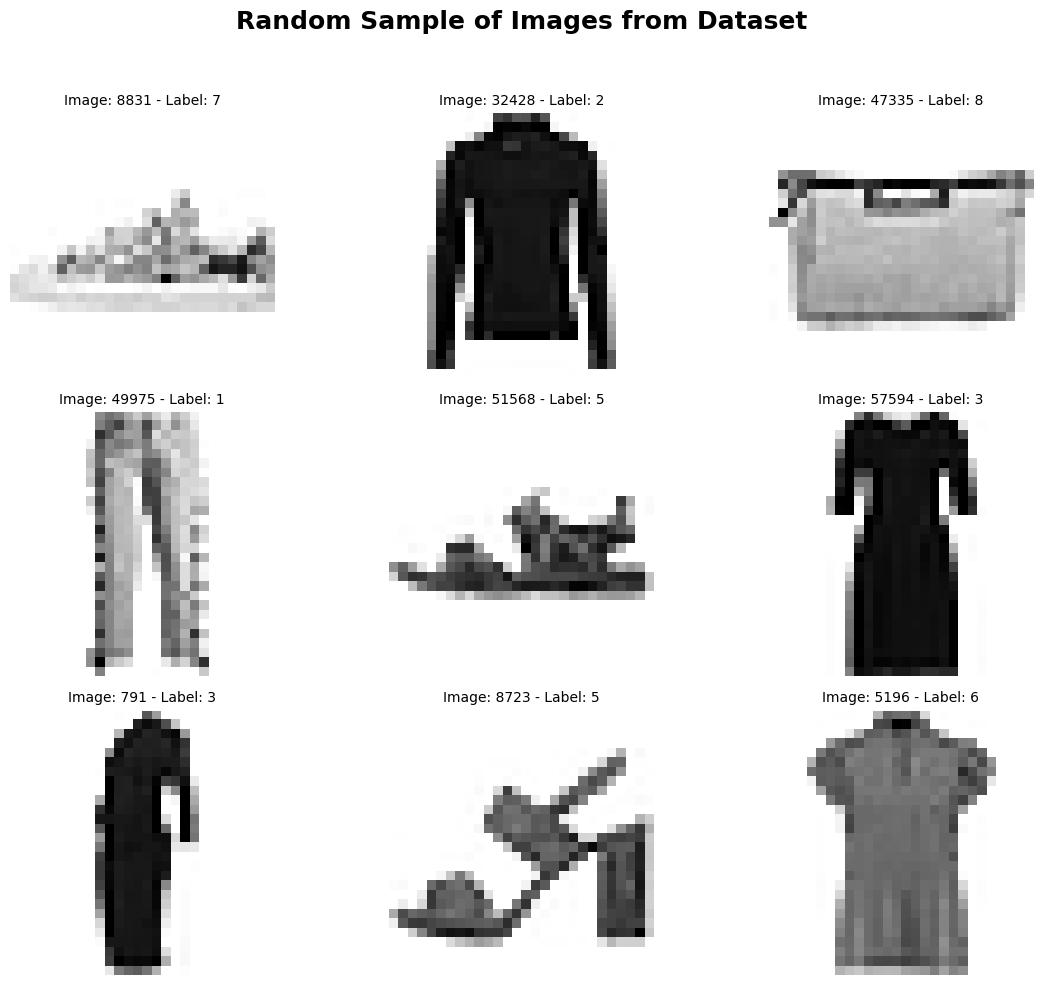

In [3]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size

print(f'The number of images = {number_images}')
print(f'The number of classes = {number_classes}')

# Improved grid visualization
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Random Sample of Images from Dataset', fontsize=18, fontweight='bold')

for ax in axes.flat:
    cur = np.random.randint(number_images)
    ax.imshow(Xn[cur].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    ax.set_title(f'Image: {cur} - Label: {yn[cur]}', fontsize=10)  # Adjusted to match 1D array indexing
    ax.axis('off')  # Hide axes for a cleaner look

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate main title
plt.show()



## 🌟 🚀 Preprocessing the dataset using PCA 

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Work to do :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components, print the corresponding "explained variance ratio". 
- Comment the pictures.

Original dimension of the dataset (before PCA) = (60000, 784)
Number of dimensions after PCA (90% variance) = (60000, 84)


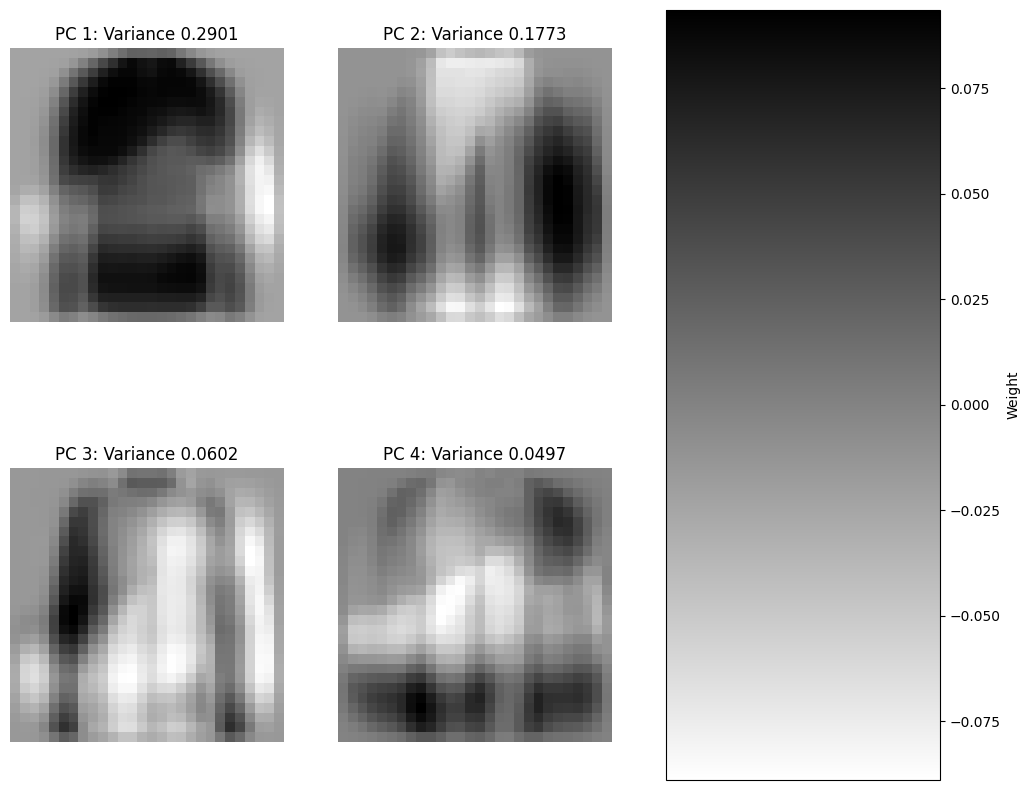

In [4]:
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec

# Apply PCA to the dataset
pca = PCA(0.90)  # Retain 90% of the variance
Xn_r = pca.fit_transform(Xn)  # Fit and transform the dataset

# Print dimensions before and after PCA
print("Original dimension of the dataset (before PCA) =", Xn.shape)
print("Number of dimensions after PCA (90% variance) =", Xn_r.shape)

# Improved visualization of the first 4 principal components
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 3, figure=fig)  # Create a grid with space for colorbar

# Add subplots for the first 4 components
axes = []
for i in range(4):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Place in a 2x2 grid
    pc = pca.components_[i].reshape(28, 28)
    img = ax.imshow(pc, cmap='gray_r', interpolation='nearest')
    ax.set_title(f"PC {i+1}: Variance {pca.explained_variance_ratio_[i]:.4f}", fontsize=12)
    ax.axis('off')
    axes.append(ax)

# Add a colorbar to the right
cbar_ax = fig.add_subplot(gs[:, 2])  # Use the last column for the colorbar
fig.colorbar(img, cax=cbar_ax, orientation='vertical', label='Weight')





## 🌟 🚀 K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [5]:
from sklearn.cluster import KMeans
target_nb_clusts = 1000

# COMPLETE THE CODE HERE...

k_means = KMeans(target_nb_clusts,random_state=0)# COMPLETE THE CODE HERE...
k_means.fit(Xn_r)   # COMPLETE THE CODE HERE...

nb_clusts =k_means.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts)

The numbers of k-means resulting clusters is  1000



### 🔹 🌟 🚀 Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts**lists named **cluster_index**, where:
- **cluster_index[i]**contains the indices from **X**of vectors that belong to cluster # 🚀 **i**.

In [6]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)



# In order to assess the quality of produced clusters, here we will visualize the content of few clusters.

Number of images in cluster 3: 89


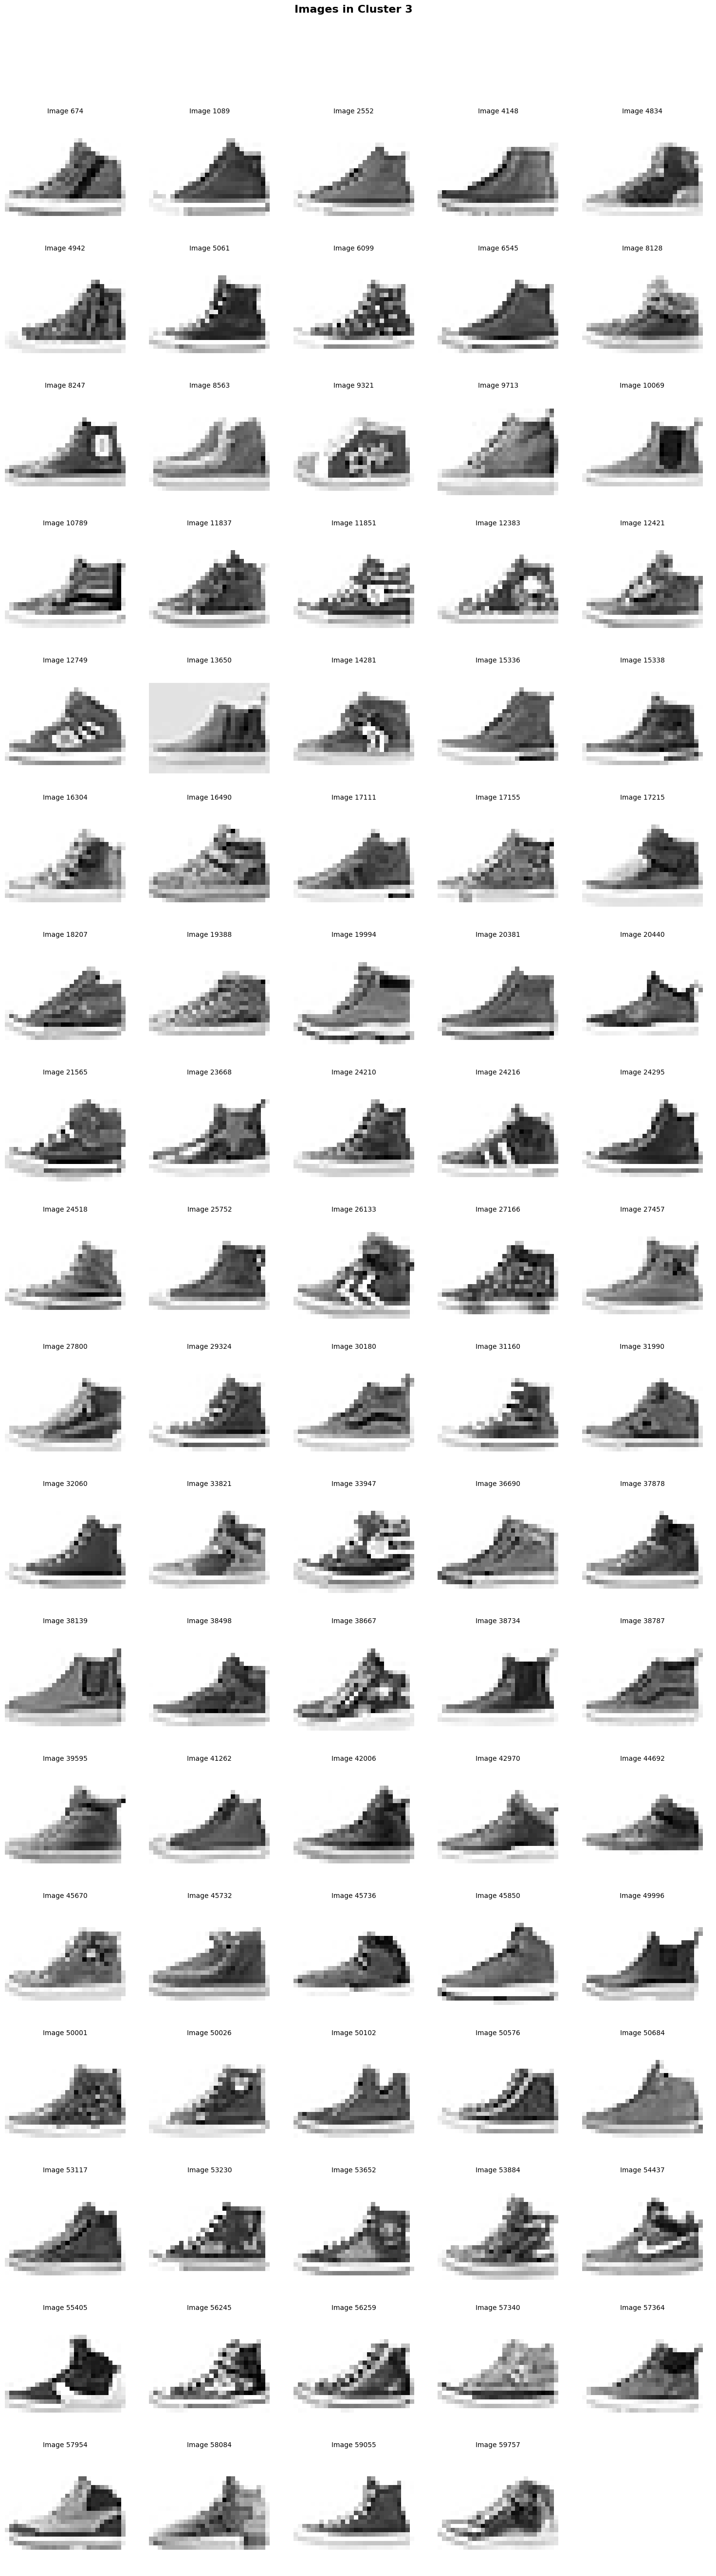

In [10]:
clust = 3  # ID of cluster to visualize

# Get indices of images in the specified cluster
clusterI = cluster_index[clust]  # COMPLETE THE CODE HERE...

# Define the number of images to visualize
num_images = len(clusterI)
print(f"Number of images in cluster {clust}: {num_images}")

# Set up grid size for visualization
cols = 5  # Number of columns in the grid
rows = (num_images // cols) + int(num_images % cols > 0)  # Calculate rows dynamically

# Create a grid layout for displaying images
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
fig.suptitle(f"Images in Cluster {clust}", fontsize=16, fontweight='bold')

# Populate the grid with images
for idx, ax in enumerate(axes.flat):
    if idx < num_images:
        img_index = clusterI[idx]
        ax.imshow(Xn[img_index].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        ax.set_title(f"Image {img_index}", fontsize=10)
        ax.axis('off')  # Hide axes for a cleaner look
    else:
        ax.axis('off')  # Hide any unused grid cells

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


We can even plot the histogram of the class labels of vectors contained in the cluster.

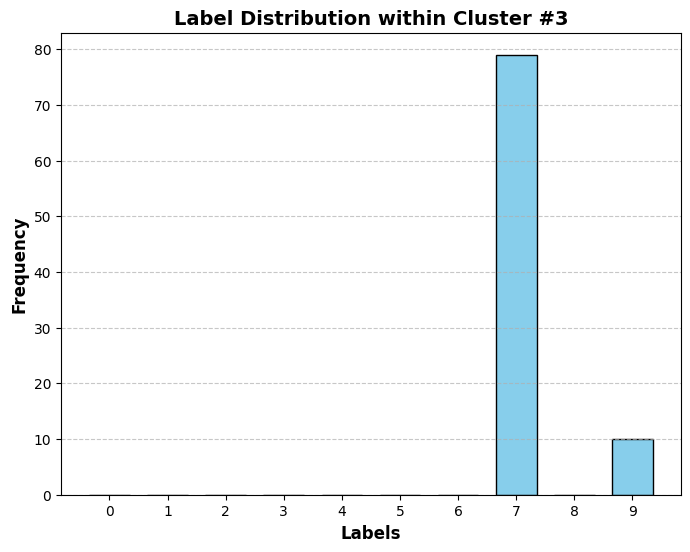

In [11]:
# Get the number of images in the cluster
s = len(clusterI)

# Create and fill an array "clusterL" with the labels of images belonging to the cluster
clusterL = np.zeros(s, dtype=int)
for i in range(s):
    clusterL[i] = yn[clusterI[i]]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(clusterL, bins=np.arange(11) - 0.5, rwidth=0.7, align='mid', color='skyblue', edgecolor='black')

# Adding grid, labels, and title
plt.xticks(range(10), fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Labels', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Label Distribution within Cluster #{clust}', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



## Further Experiments

### 1. Clustering with \( k = 10 \) (Number of Classes in the Dataset)
- Perform clustering using a value of \( k \) equal to the number of classes in the dataset, i.e., \( k = 10 \). 
- **Analysis**: What do you notice about the resulting clusters? Are the clusters aligned with the known classes? Discuss their coherence and potential overlap.

---

### 2. Clustering with \( k = 1000 \) Without PCA
- Repeat the clustering experiment with \( k = 1000 \), but **omit the preprocessing step using PCA** (i.e., without any dimensionality reduction).
- **Analysis**:
  - Compare the clustering results obtained with and without PCA.
  - How does dimensionality reduction impact the clustering quality, computational efficiency, and interpretability?

---

### 3. Comparing the Quality of Different Clustering Results
- **Objective**:
  - Perform two different clustering experiments by varying internal parameters (e.g., \( k \), use of PCA).
  - Propose objective measures to compare the quality of the resulting clusters.
  
- **Implementation Ideas**:
  1. **Cluster Quality Metrics**:
     - Use metrics like **Silhouette Score**, **Davies-Bouldin Index**, or **Calinski-Harabasz Index** to evaluate cluster cohesion and separation.
  2. **Class Consistency**:
     - If true class labels are available, measure cluster purity, Normalized Mutual Information (NMI), or Adjusted Rand Index (ARI).
  3. **Visualization**:
     - Visualize clusters using dimensionality reduction techniques (e.g., t-SNE, UMAP) to assess their structure qualitatively.

- **Discussion**:
  - Compare the clusters quantitatively using the above metrics and discuss which parameter settings lead to better clustering performance.
  - Highlight trade-offs between computational cost and clustering quality.

---

### Deliverables
- Clear visualizations (e.g., cluster scatter plots).
- Quantitative results using selected evaluation metrics.
- A concise comparison and conclusion based on your findings.


# 🌟 🚀 Clustering with \( k = 10 \)

## Objective
Perform clustering using \( k = 10 \), the number of classes in the dataset

The number of k-means resulting clusters is 10


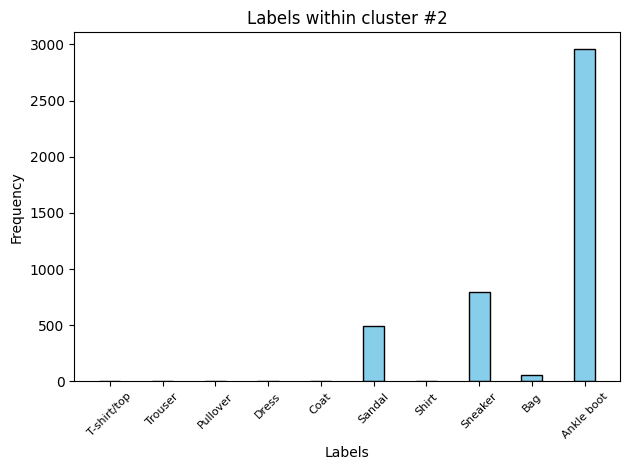

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
target_nb_clusts2 = 10

# Initialize and fit the KMeans model
k_means3 = KMeans(n_clusters=target_nb_clusts2, random_state=0)
k_means3.fit(Xn_r)

# Number of resulting clusters
nb_clusts3 = k_means3.n_clusters
print("The number of k-means resulting clusters is", nb_clusts3)

# Create an array of lists to store the indexes of points in each cluster
cluster_index3 = [[] for _ in range(nb_clusts3)]

# Populate the cluster index lists
for i, label in enumerate(k_means3.labels_):
    cluster_index3[label].append(i)

# Choose a cluster ID to visualize
clust = 2  # ID of the cluster to visualize
clusterI3 = cluster_index3[clust]

# Extract labels for the chosen cluster
clusterL3 = yn[clusterI3]

# Create a histogram of the labels within the chosen cluster
plt.hist(clusterL3, bins=np.arange(11) - 0.5, rwidth=0.4, align='mid', color='skyblue', edgecolor='black')
plt.title(f'Labels within cluster #{clust}', fontsize=12)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(np.arange(10), 
           ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], 
           rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


# 🌟 🚀 Clustering with \( k = 1000 \) Without PCA

## Objective
Perform clustering with \( k = 1000 \), but this time **without applying PCA or any dimensionality reduction**.


The number of k-means resulting clusters is 1000
Number of points in cluster #2: 40


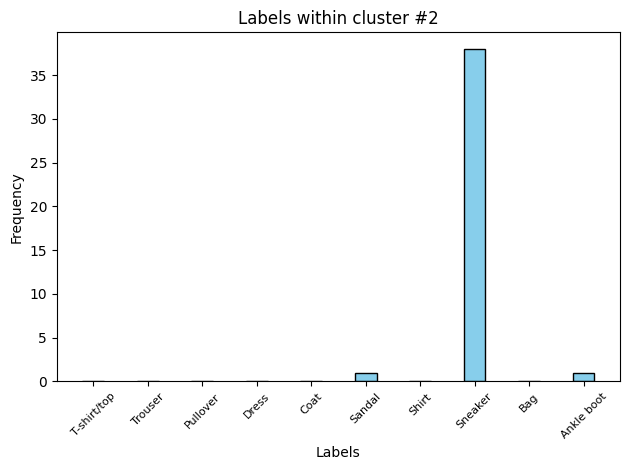

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
target_nb_clusts = 1000

# Initialize and fit the KMeans model
k_means2 = KMeans(n_clusters=target_nb_clusts, random_state=0)
k_means2.fit(Xn)

# Number of resulting clusters
nb_clusts2 = k_means2.n_clusters
print("The number of k-means resulting clusters is", nb_clusts2)

# Create an array of lists to store the indexes of points in each cluster
cluster_index2 = [[] for _ in range(nb_clusts2)]

# Populate the cluster index lists
for i, label in enumerate(k_means2.labels_):
    cluster_index2[label].append(i)

# Choose a cluster ID to visualize
clust = 2  # ID of the cluster to visualize
clusterI2 = cluster_index2[clust]

# Print the size of the chosen cluster
print(f"Number of points in cluster #{clust}: {len(clusterI2)}")

# Extract labels for the chosen cluster
clusterL2 = yn[clusterI2]

# Create a histogram of the labels within the chosen cluster
plt.hist(clusterL2, bins=np.arange(11) - 0.5, rwidth=0.4, align='mid', color='skyblue', edgecolor='black')
plt.title(f'Labels within cluster #{clust}', fontsize=12)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(np.arange(10), 
           ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], 
           rotation=45, fontsize=8)

plt.tight_layout()
plt.show()


 # Analyse the result and compare it to the result with PCA : 
 
 

# Hierarchical Clustering

Clusters from K-Means seem to be of good quality; vectors within each cluster are mostly from the same class, considering the ground truth (true classes) of images in the dataset.

However, **1000 clusters** is too much, especially since the dataset is composed of **10 classes**.

To address this, we can use **hierarchical clustering** to group the K-Means clusters and reduce them to match the number of classes.

---

### Steps
- Apply hierarchical clustering on K-Means centroids using the **Ward criterion**.
- Plot the resulting dendrogram.

---

### Required Functions
Use the following functions from `scipy.cluster.hierarchy`:
- `linkage`
- `dendrogram`
- `fcluster`


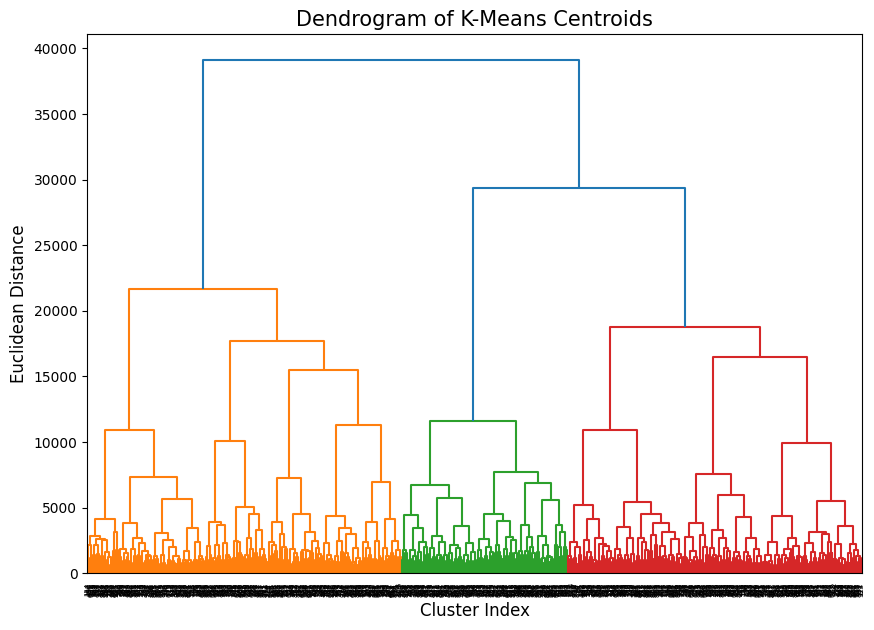

In [14]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster
import matplotlib.pyplot as plt

# Assuming k_means is already fitted and centroids_after_kmeans are obtained
centroids_after_kmeans = k_means.cluster_centers_

# Perform hierarchical clustering using the Ward method
linkage_data = linkage(centroids_after_kmeans, method='ward', metric='euclidean')

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linkage_data)
plt.title("Dendrogram of K-Means Centroids", fontsize=15)
plt.xlabel("Cluster Index", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.show()


### Observation

We notice that the dendrogram is compressed because the distance between the centroids of the clusters is very small. This makes it difficult to visualize the individual clusters clearly. Additionally, the compression occurs because we are working with **1000 clusters** after applying K-Means, which further exacerbates the issue of visualizing the hierarchical structure.


### From the Dendrogram:
- **Select 10 clusters** based on the hierarchical clustering structure.
- Store the obtained clusters in a variable named **final_clusters**.
- Create an array of lists called **clustLL**, where:
    - **clustLL[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

### TO DO:
- Extract the **final_clusters** using the function `fcluster`.


In [15]:
from scipy.cluster.hierarchy import fcluster

# Extract final clusters using fcluster
final_clusters = fcluster(linkage_data, t=10, criterion='maxclust')

# Initialize an array of lists for storing the cluster indices
clustLL = [[] for _ in range(10)]

# Loop through the final clusters to assign indices to corresponding clusters
for j in range(10):
    for i in range(final_clusters.shape[0]):
        if (final_clusters[i] - 1 == j):  # Subtract 1 for zero-based index
            clustLL[j].append(i)  # Store the index in the appropriate cluster

# Print the number of points in each cluster
for j in range(10):
    print(f"Cluster #{j}: {len(clustLL[j])} points")

# Verify the total number of data points matches the original dataset
total_points = sum(len(clustLL[j]) for j in range(10))
print(f"Total number of points: {total_points}")


Cluster #0: 152 points
Cluster #1: 81 points
Cluster #2: 70 points
Cluster #3: 52 points
Cluster #4: 51 points
Cluster #5: 96 points
Cluster #6: 118 points
Cluster #7: 148 points
Cluster #8: 103 points
Cluster #9: 129 points
Total number of points: 1000


### Remark:
We notice that the total number of images contained in the 10 clusters is **10000**. This confirms that every image in the dataset has been correctly assigned to a cluster, and the indices have been properly distributed across the clusters obtained through hierarchical clustering.


### Now that we have identified the final clusters, we can check their coherence with respect to the 10 classes of our dataset. 🔍

We can do this by plotting the labels of vectors in each of the 10 final clusters. 📊

Let's start by checking **cluster #6**... 🧐

Perform this verification for all of the clusters. ✔️


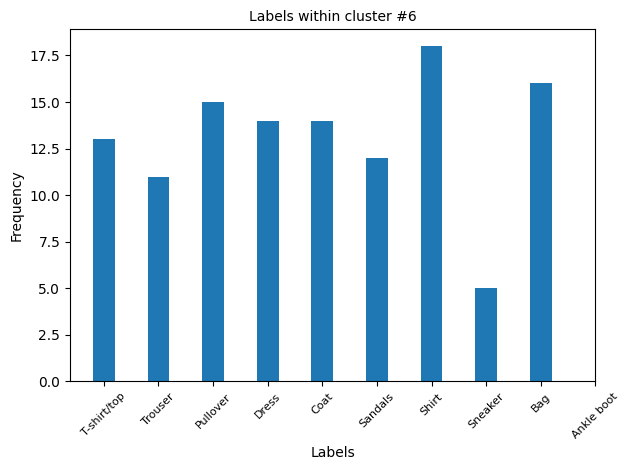

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Choose the cluster to inspect (cluster #6 in this case)
num_clust = 6

# Create a list to store the labels for the selected cluster
clusterL = []

# Loop through the indices of the vectors in the selected cluster and append their corresponding labels
for i in clustLL[num_clust]:
    clusterL.append(yn[i])  # Access yn[i] directly (since it's 1-dimensional)

# Plot the histogram of labels within the selected cluster
plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

# Title and axis labels for clarity
plt.title(f'Labels within cluster #{num_clust}', fontsize=10)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Adjust x-ticks to display the class names
plt.xticks(np.arange(10), 
           ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
           rotation=45, fontsize=8)

# Display the plot
plt.tight_layout()  # Ensures labels fit without overlapping
plt.show()


### 📝 Remark:
We observe that the cluster is not perfectly homogeneous, as it contains elements from different classes. 🤔 This suggests that while the clustering algorithm groups similar data points together, it does not always align with the true class labels. 

Several factors could explain this imperfection:
- **🔢 Number of Clusters**: The chosen number of clusters may not accurately represent the true structure of the data.
- **📊 Data Complexity**: There could be overlap in features or inherent complexity in the data that makes it difficult to perfectly separate the classes.
- **⚙️ Clustering Limitations**: The clustering technique itself may have limitations, such as sensitivity to initialization or the choice of distance metric.

Therefore, while the algorithm does group similar data points, the alignment with ground truth labels may still have some discrepancies. 🧐


## Further experiments:

#### - Perform different clusterings varying internal parameters (PCA, K-Means, and Hierarchical clustering).

To explore the effects of different clustering methods and parameters, we can:
- **Apply PCA (Principal Component Analysis)** to reduce dimensionality and improve clustering performance.
- **Use K-Means** with varying values of **k** (number of clusters) to evaluate how the number of clusters influences the results.
- **Try Hierarchical Clustering** with different linkage methods (e.g., "ward", "complete", or "average") to see how the choice of linkage impacts the final clusters.

#### - How can you compare the quality of the resulting clusters? Try to propose and implement objective measures for that. 

To evaluate and compare the quality of the clusters, we can use the following objective measures:

1. **Silhouette Score** 🏆: This measure evaluates how well each point lies within its cluster compared to other clusters. It ranges from -1 (worst) to +1 (best), where a higher score indicates better-defined clusters.
   ```python
   from sklearn.metrics import silhouette_score
   silhouette_avg = silhouette_score(X, labels)
   print(f"Silhouette Score: {silhouette_avg}")


# Hierarchical clustering WITH K=10

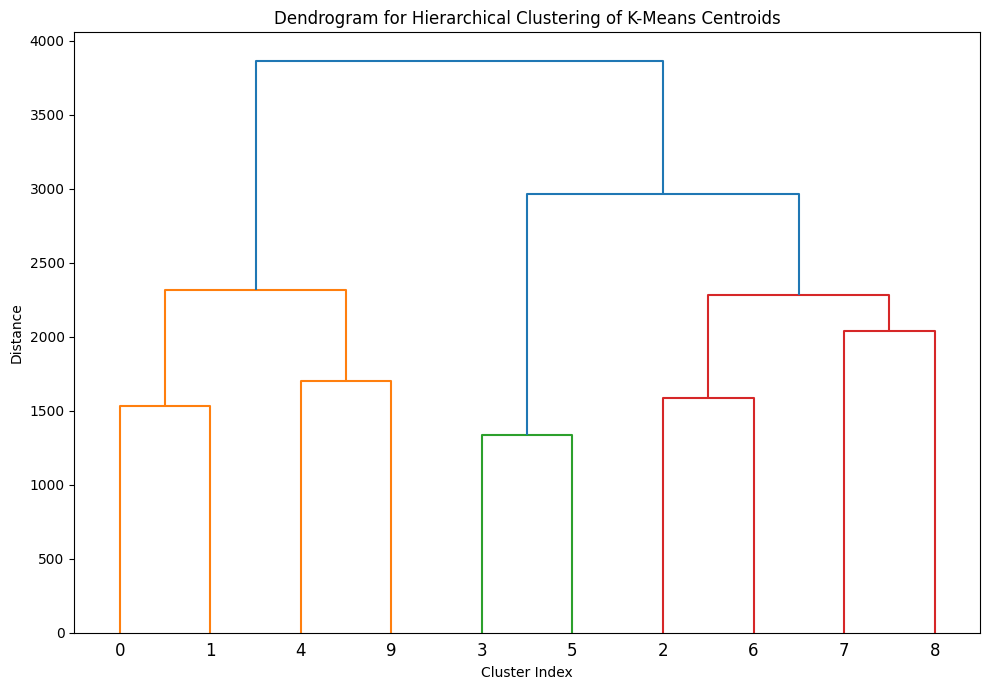

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster

# Assuming k_means3 has already been defined and fitted with your data
centroids_after_kmeans00 = k_means3.cluster_centers_

# Perform hierarchical clustering on the centroids of the k-means clusters using the 'ward' linkage method
linkage_data_k10 = linkage(centroids_after_kmeans00, method='ward', metric='euclidean')

# Create and display the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_data_k10)
plt.title('Dendrogram for Hierarchical Clustering of K-Means Centroids', fontsize=12)
plt.xlabel('Cluster Index', fontsize=10)
plt.ylabel('Distance', fontsize=10)
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


### Remarque:
We observe that the dendrogram is very clear and easy to visualize, as we are dealing with only 10 clusters. 🎯 This simplification makes it easier to interpret the structure and relationships between the clusters.

- We also notice that **cluster 0** and **cluster 2** are very close to each other, as they are grouped together first. Subsequently, the newly formed cluster (from cluster 0 and cluster 2) is merged with **cluster 1**. 🔗
  
This indicates that the centroids of clusters 0 and 2 are quite similar in terms of their features, and thus, the hierarchical clustering algorithm identifies them as part of a similar group. 🤝


# Histogramme :

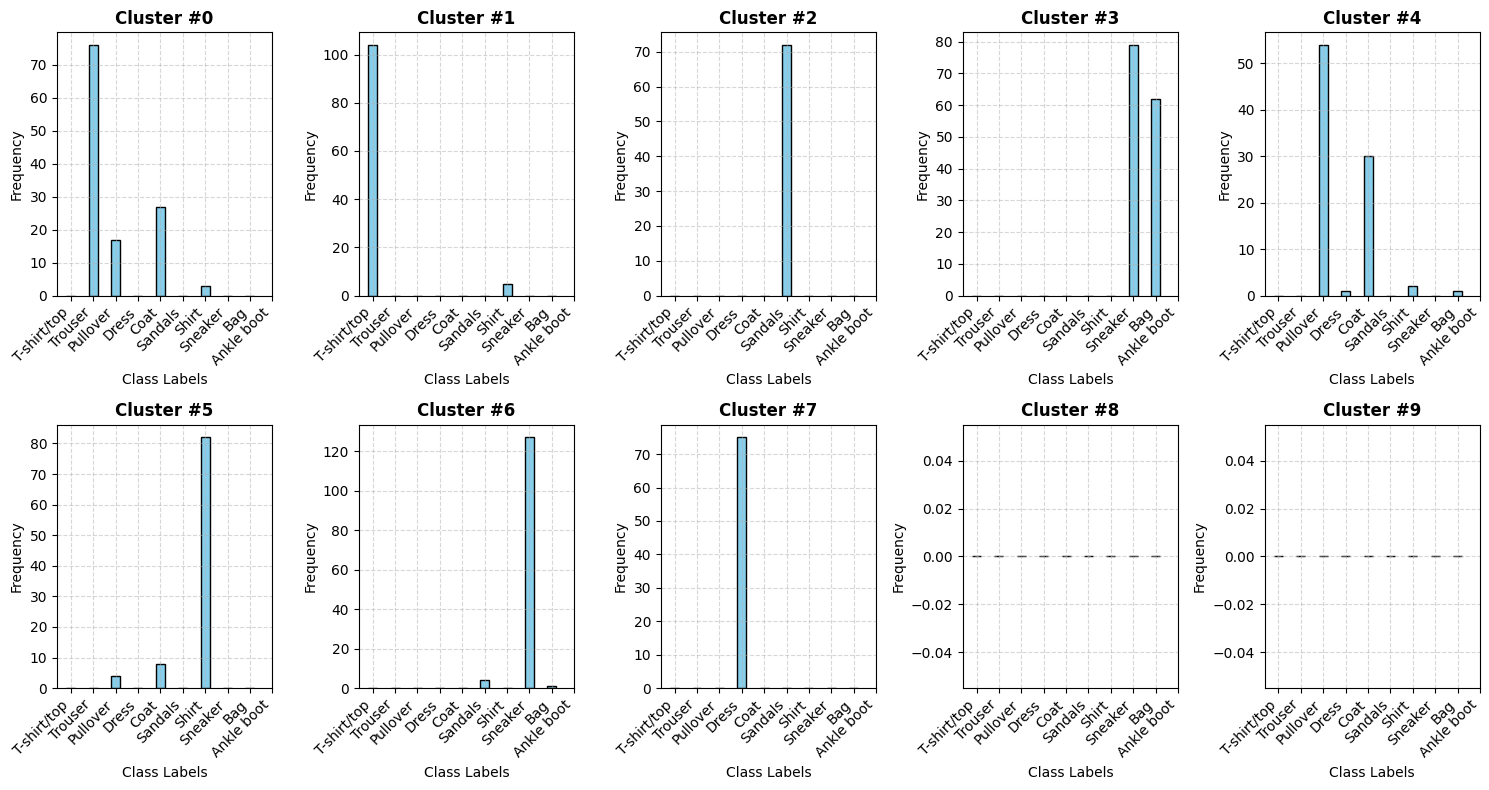

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assigning the final clusters from hierarchical clustering
final_clusters0 = fcluster(linkage_data_k10, t=10, criterion='maxclust')

# Creating an empty list to store the indices of data points in each cluster
clustLL0 = [[] for _ in range(10)]

# Grouping indices of data points according to the final clusters
for i in range(final_clusters0.shape[0]):
    cluster_id = final_clusters0[i] - 1  # Adjust for 0-indexing
    clustLL0[cluster_id].extend(cluster_index[i])

# Set up subplots to display all clusters in a grid format (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Loop through each of the 10 clusters and plot the labels
for num_clust0 in range(10):
    clusterL0 = [yn[i] for i in clustLL0[num_clust0]]  # Collect labels for the current cluster
    
    # Plotting the histogram of labels within the current cluster
    axes[num_clust0].hist(clusterL0, bins=range(10), rwidth=0.4, align='left', color='skyblue', edgecolor='black')

    # Title and formatting for each subplot
    axes[num_clust0].set_title(f'Cluster #{num_clust0}', fontsize=12, fontweight='bold')
    axes[num_clust0].set_xticks(np.arange(10))
    axes[num_clust0].set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, ha='right', fontsize=10)
    axes[num_clust0].set_ylabel('Frequency', fontsize=10)
    axes[num_clust0].set_xlabel('Class Labels', fontsize=10)
    
    # Grid for better readability
    axes[num_clust0].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()


#Affichage de L'histogramme de 10 premier cluster avec k=10000



# Hierarchical clustering Without PCA


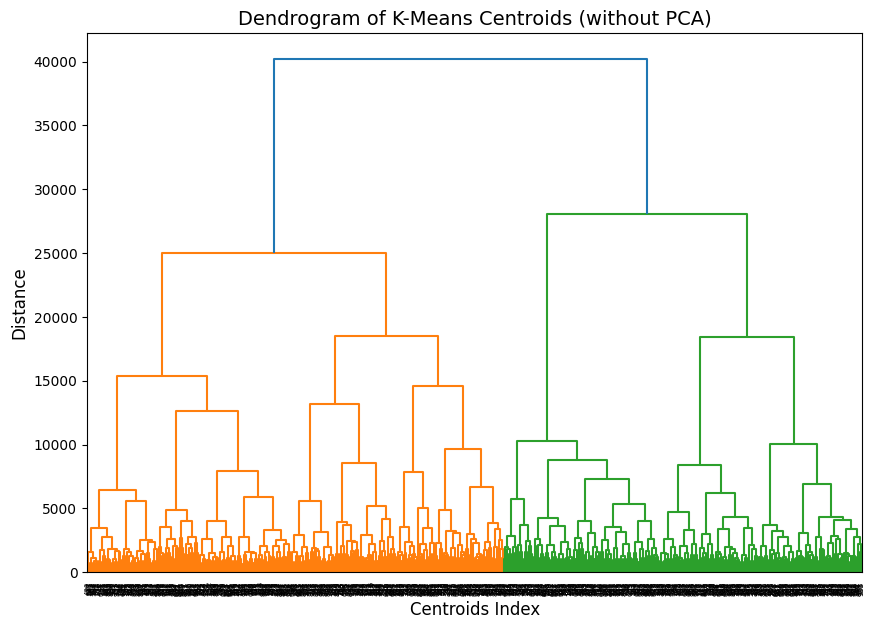

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming k_means2 is already fitted and centroids_after_kmeans are the cluster centers
centroids_after_kmeans = k_means2.cluster_centers_

# Perform hierarchical clustering (Ward's method) on the K-Means centroids
linkage_data_without_PCA = linkage(centroids_after_kmeans, method='ward', metric='euclidean')

# Create a plot for the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_data_without_PCA)

# Show the plot
plt.title('Dendrogram of K-Means Centroids (without PCA)', fontsize=14)
plt.xlabel('Centroids Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Display the plot
plt.show()


# Histogramme 



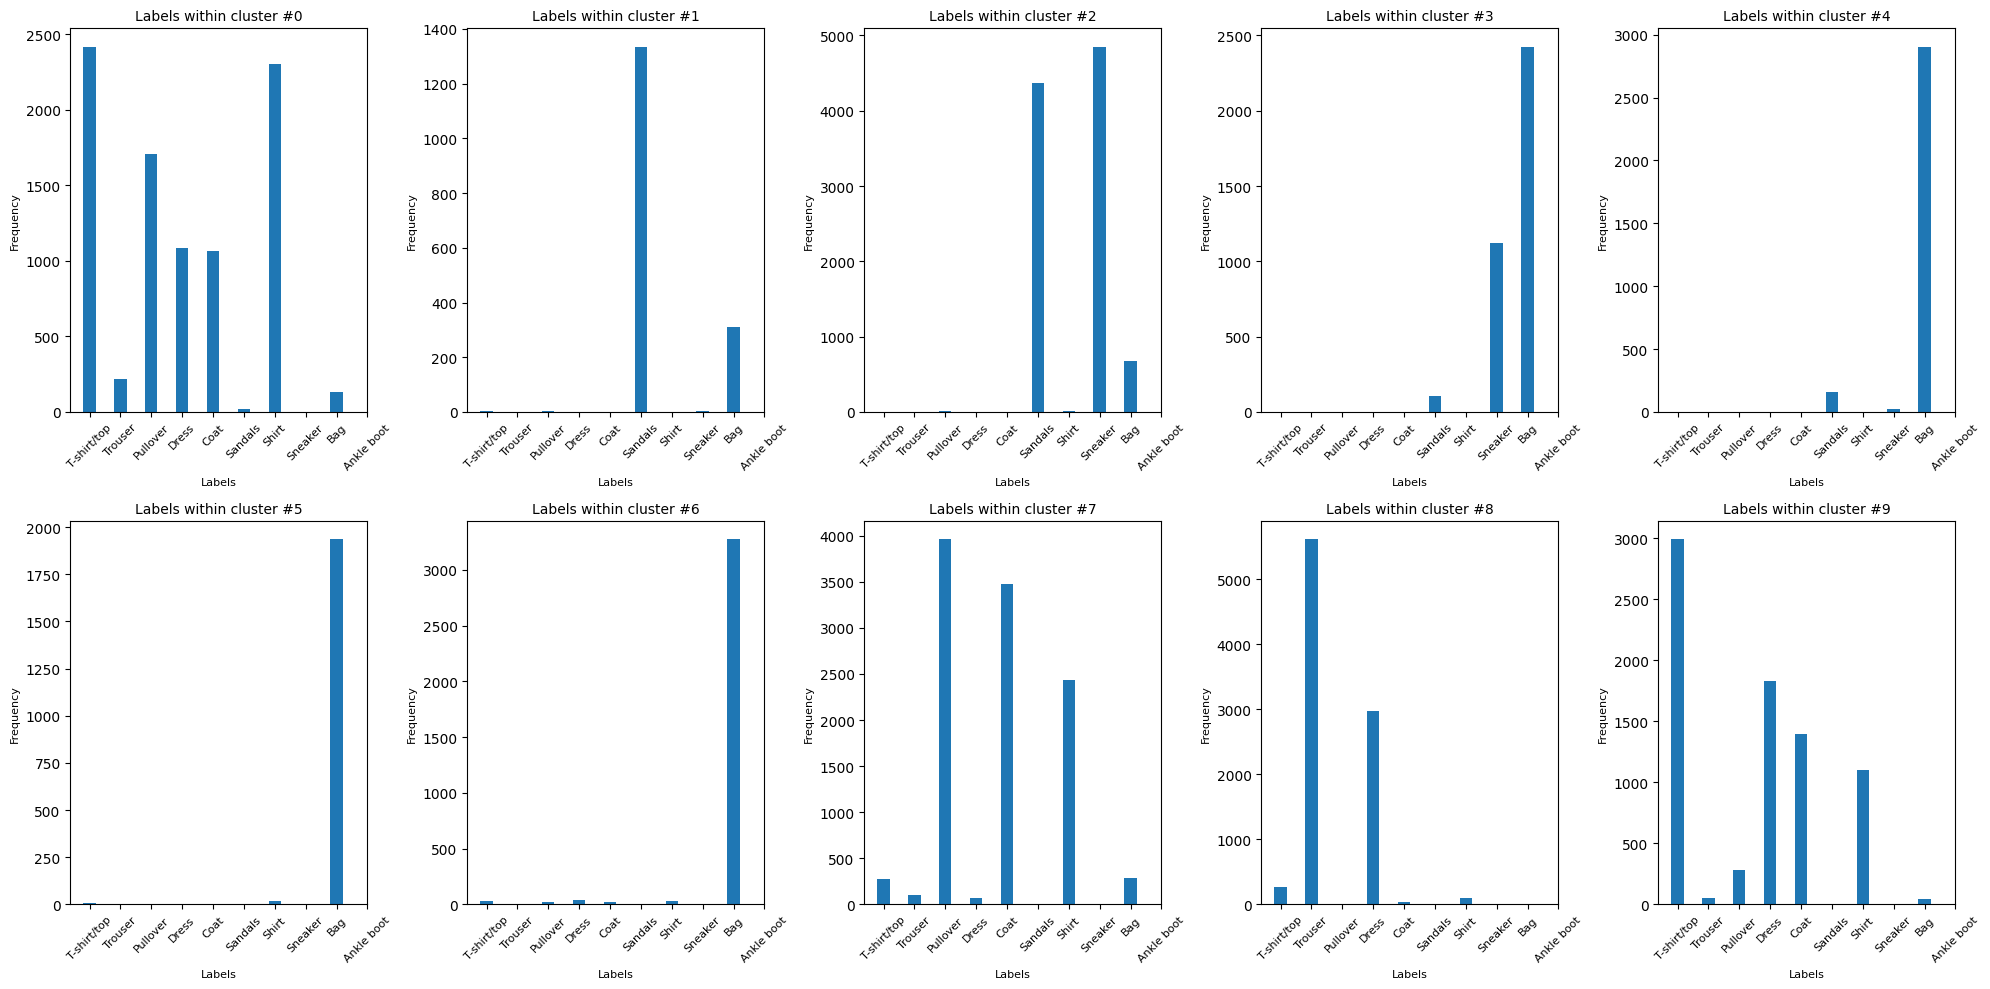

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the final clusters from the hierarchical clustering (using 'fcluster')
final_clusters2 = fcluster(linkage_data_without_PCA, t=10, criterion='maxclust')

# Initialize an empty list to hold the data points for each cluster
clustLL2 = [[] for _ in range(10)]

# Assign data points to the corresponding cluster
for i in range(final_clusters2.shape[0]):
    cluster_id = final_clusters2[i] - 1  # Adjusting for 0-based indexing
    clustLL2[cluster_id].extend(cluster_index2[i])

# Setup the figure with a larger size for subplots
fig = plt.figure(figsize=(20, 10))

# Loop through each of the 10 clusters to plot the labels
s = 1
for num_clust2 in range(10):
    # Extract labels for the current cluster, assuming yn is 1-dimensional
    clusterL2 = [yn[i] for i in clustLL2[num_clust2]]  # Directly access yn[i] instead of yn[i, 0]

    # Add a subplot for each cluster
    ax = fig.add_subplot(2, 5, s)
    ax.hist(clusterL2, bins=range(10), rwidth=0.4, align='left')
    
    ax.set_title(f'Labels within cluster #{num_clust2}', fontsize=10)
    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                        'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, fontsize=8)
    
    ax.set_xlabel('Labels', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    
    s += 1  # Increment for the next subplot

# Display the plot with all subplots
plt.tight_layout()  # Ensure there's no overlap between subplots
plt.show()


# Hierarchical clustering Without k-means


Explained variance ratio: 0.9577785810293503


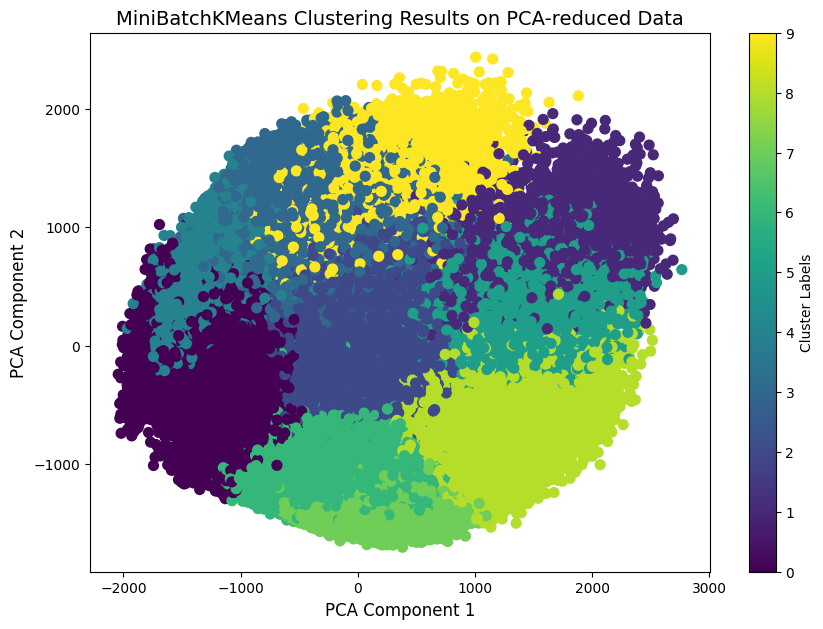

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# Assuming Xn_r is your dataset (replace with actual dataset)
# Step 1: Apply PCA to reduce the dimensionality to 50 components
pca = PCA(n_components=50)  # Reduce to 50 components (adjustable)
Xn_r_pca = pca.fit_transform(Xn_r)

# Check the amount of variance explained by the selected components
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_)}")

# Step 2: Perform MiniBatchKMeans Clustering on the reduced data (specify the number of clusters)
kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10000)  # batch_size is adjustable
kmeans.fit(Xn_r_pca)

# Step 3: Plot the resulting labels in the reduced PCA space
plt.figure(figsize=(10, 7))
plt.scatter(Xn_r_pca[:, 0], Xn_r_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('MiniBatchKMeans Clustering Results on PCA-reduced Data', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster Labels')
plt.show()


In [36]:
#2D matrix  for an array of indexes of the given label
cluster_index0= [[] for j in range(10000)]

for i in range(Xn_r.shape[0]):
    for j in range(10000):
        if k_means.labels_[i] == j:
            cluster_index0[j].append(i)

# HISTOGRAMME 

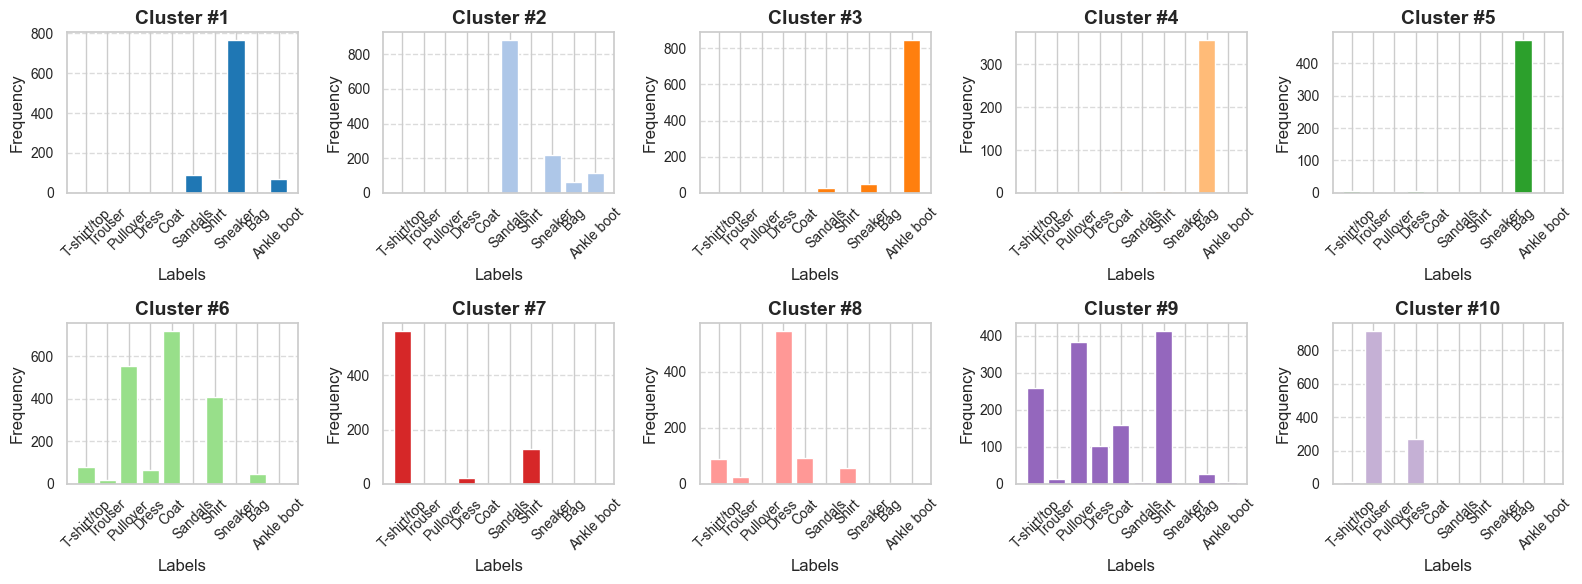

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# Assuming Xn_r is your dataset and yn contains the true labels
# Let's assume you have preprocessed the dataset (e.g., scaled, normalized) and reduced dimensions using PCA

# Step 1: Apply PCA to reduce the dimensionality (preserving 90% variance)
pca = PCA(n_components=84)  # After PCA (90% variance explained)
Xn_r_pca = pca.fit_transform(Xn_r)

# Step 2: Downsample the dataset (for example, take the first 10,000 samples)
Xn_r_pca_sampled = Xn_r_pca[:10000, :]

# Step 3: Perform hierarchical clustering on the downsampled data
linkage_data_Without_kmeans = linkage(Xn_r_pca_sampled, method='ward', metric='euclidean')

# Step 4: Get final cluster assignments (e.g., divide into 10 clusters)
final_clusters3 = fcluster(linkage_data_Without_kmeans, t=10, criterion='maxclust')

# Step 5: Organize data points into clusters
clustLL3 = [[] for _ in range(10)]  # List to hold indices for each cluster
for i in range(final_clusters3.shape[0]):
    cluster_idx = final_clusters3[i] - 1  # Adjust for zero-indexing
    clustLL3[cluster_idx].append(i)  # Append data point index to its corresponding cluster

# Step 6: Visualize the labels distribution within each cluster in a single figure (horizontally)
sns.set(style="whitegrid")  # Use a clean style with gridlines from seaborn
plt.figure(figsize=(16, 6))  # Set figure size to fit all subplots horizontally

# Use 'tab20' color palette, which has 20 distinct colors (sufficient for 10 clusters)
colors = sns.color_palette("tab20", 10)  # Select 10 distinct colors

# Loop over each cluster and plot the histograms in subplots
for k in range(10):
    num_clust3 = k
    clusterL3 = [yn[i] for i in clustLL3[num_clust3]]  # Collect labels for the current cluster

    # Create a subplot for the current cluster (2 rows and 5 columns grid)
    plt.subplot(2, 5, k+1)  # 2 rows, 5 columns, k+1 for subplot index
    plt.hist(clusterL3, bins=range(11), rwidth=0.8, align='left', color=colors[k])  # Use different colors for each cluster

    # Title and formatting
    plt.title(f'Cluster #{num_clust3+1}', fontsize=14, weight='bold')
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Customizing ticks and labels
    plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout so that subplots don't overlap and everything fits
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()
